In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/aadya.mukherjee/Documents/git my/mrm_kmean/data.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features for clustering
features = data.drop(columns=["country"])

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

normalized_data[:5]  # Preview the normalized data


array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

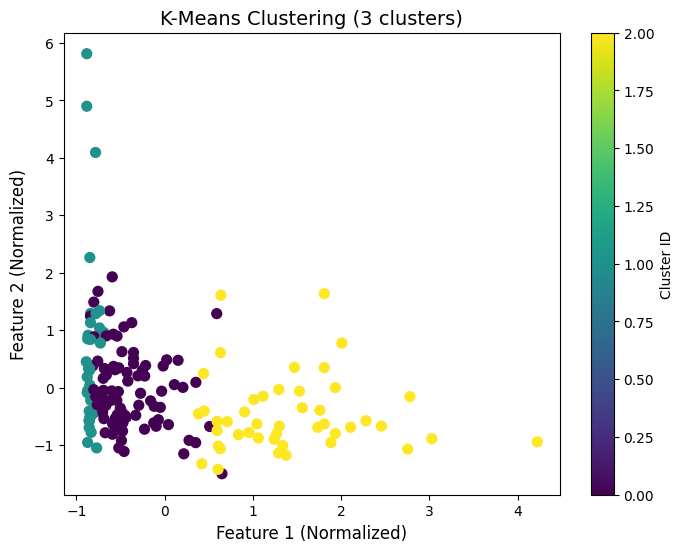

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_data)

# Visualize the K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (3 clusters)', fontsize=14)
plt.xlabel('Feature 1 (Normalized)', fontsize=12)
plt.ylabel('Feature 2 (Normalized)', fontsize=12)
plt.colorbar(label='Cluster ID')
plt.show()


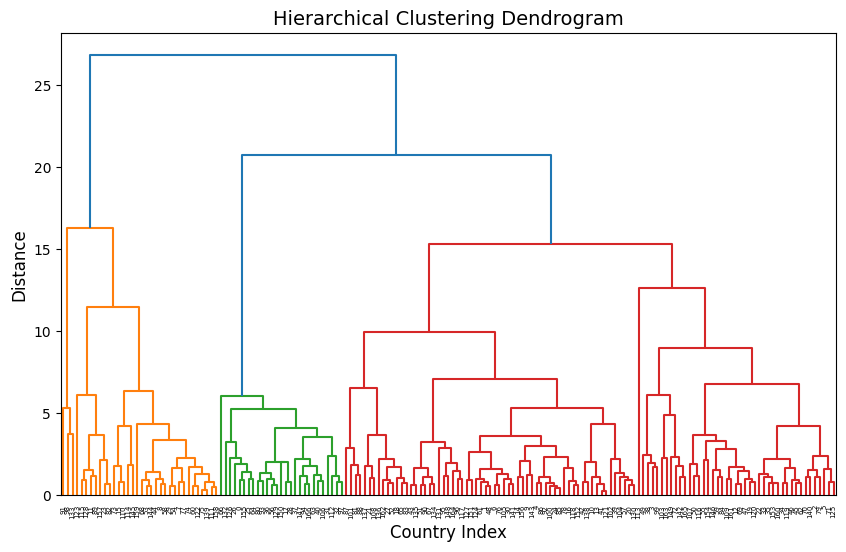

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Hierarchical Clustering
linked = linkage(normalized_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Country Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()


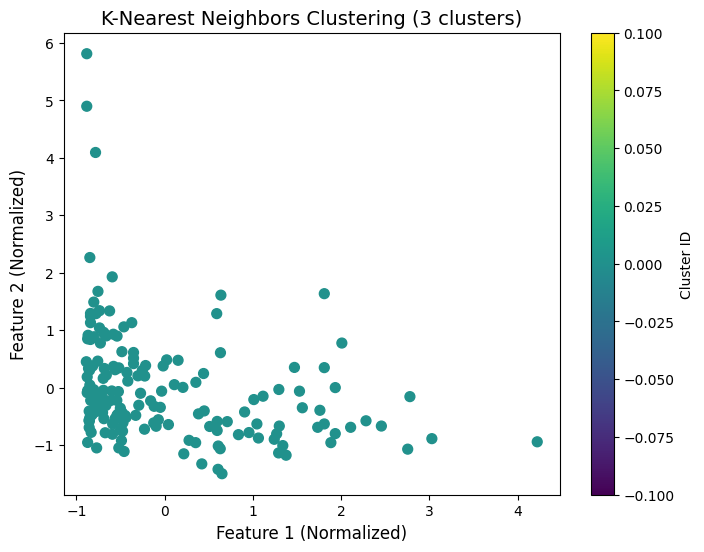

In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Define K for K-Nearest Neighbors (KNN) clustering
k = 3
neighbors = NearestNeighbors(n_neighbors=k)
knn_model = neighbors.fit(normalized_data)

# Find the k-nearest neighbors for each data point
distances, indices = knn_model.kneighbors(normalized_data)

# Assign clusters based on proximity
knn_labels = np.array([np.argmin(np.sum(distances[i])) for i in range(len(distances))])

# Visualize the KNN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=knn_labels, cmap='viridis', s=50)
plt.title('K-Nearest Neighbors Clustering (3 clusters)', fontsize=14)
plt.xlabel('Feature 1 (Normalized)', fontsize=12)
plt.ylabel('Feature 2 (Normalized)', fontsize=12)
plt.colorbar(label='Cluster ID')
plt.show()